# Calibração de Sensores de Baixo Custo para Monitoramento da Qualidade do Ar utilizando Redes Neurais Bayesianas

## Introdução

**Conjunto de dados - ENEA Pirelli**

**Resumo**: Conjunto de dados obtido no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+Quality) que contém respostas de um dispositivo multisensor para monitoramento de gases implantado em uma cidade italiana. Média horárias das respostas dos sensores são gravadas junto às concentrações de gases referências obtidas por instrumentos certificados de análise instalados em estações de monitoramento.

**Fonte**: ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development - Saverio De Vito (saverio.devito@enea.it)

**Informações do cojunto de dados**: 
- O conjunto de dados contém 9358 instâncias de médias horárias de respostas de um conjunto de 5 sensores químicos óxidos metálicos implantados em um dispositivo multisensor químico para monitoramento da qualidade do ar. 
- O dispositivo estava localizado em campo em uma área significativamente poluída, em nível de tráfego, em uma cidade italiana. Dados foram coletados entre Março de 2004 e Fevereiro de 2005 (um ano) sendo o maior conjunto de dados disponibilizado de forma aberta que contém repostas de dispositivos multisensores químicos para monitoramento da qualidade do ar implantados em campo. 
- Valores médios horários das concentrações verdadeiras de CO, hidrocarbonetos não metânicos (NMHC), benzeno, NOx (óxidos de nitrogênio totais) e NO2 são fornecidos por instrumentos referências de análise gasosa alocados juntos ao dispositivo. 
- Evidências de sensibilidade cruzada e drift dos sensores do dispositivo são descritos em (DE VITO, 2008), problemas os quais afetam a capacidade dos sensores estimarem as concentrações dos gases de forma precisa. Valores ausentes são rotulados pelo valor -200.

**Infromações dos atributos**:

0. Date - Data (DD/MM/YYYY)
1. Time - Horário (HH.MM.SS)
2. CO(GT) - Concentração média horária verdadeira de CO (mg/m^3) - referência
3. PT08.S1(CO) - PT08.S1 (tin oxide) resposta média horária do sensor de CO
4. NMHC(GT) - Concentração média horária verdadeira de hidrocarbonetos não metânicos NMHC (mg/m^3) - referência
5. C6H6(GT) - Concentração média horária verdadeira de benzeno (mg/m^3) - referência
6. PT08.S2(NMHC) - PT08.S2 (titania) resposta média horária do sensor de hidrocarbonetos não metânicos NMHC
7. NOx(GT) - Concentração média horária verdadeira de NOx (ppb) - referência
8. PT08.S3(NOx) - PT08.S3 (tungsten oxide) resposta média horária do sensor de NOx
9. NO2(GT) - Concentração média horária verdadeira de NO2 (mg/m^3) - referência
10. PT08.S4(NO2) - PT08.S4 (tungsten oxide) resposta média horária do sensor de NO2
11. PT08.S5(O3) PT08.S5 (indium oxide) resposta média horária do sensor de O3
12. T - Temperatura (°C)
13. RH - Umidade relativa (%)
14. AH - Umidade absoluta

**Artigos relacionados**:

- [DE VITO, Saverio et al. On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario. Sensors and Actuators B: Chemical, v. 129, n. 2, p. 750-757, 2008](https://www.sciencedirect.com/science/article/pii/S0925400507007691)
- [DE VITO, Saverio et al. CO, NO2 and NOx urban pollution monitoring with on-field calibrated electronic nose by automatic bayesian regularization. Sensors and Actuators B: Chemical, v. 143, n. 1, p. 182-191, 2009](https://www.sciencedirect.com/science/article/pii/S092540050900673X)
- [DE VITO, Saverio et al. Semi-supervised learning techniques in artificial olfaction: A novel approach to classification problems and drift counteraction. IEEE Sensors Journal, v. 12, n. 11, p. 3215-3224, 2012](https://ieeexplore.ieee.org/abstract/document/6176193?casa_token=ZaRg6S82CdUAAAAA:IdNnXqwMuDzxdt8hEYxT0aeqDNgQvPy5kDardbtljkdaWl7uUDA-QJ9Z0eWjMUb0KX8TYXIlv3w)

**Artigo que deve ser citado**: 
- [DE VITO, Saverio et al. On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario. Sensors and Actuators B: Chemical, v. 129, n. 2, p. 750-757, 2008](https://www.sciencedirect.com/science/article/pii/S0925400507007691)

**Copyright**: Conjunto de dados por ser utilizado exclusivamente para pesquisa.

## Problema

Sensores de qualidade do ar de baixo custo, com preço inferior a $10000, tem recentemente emergido com uma potencial alternativa para o alcance de implantações de dispositivos de monitoramento com maior densidade e consequentemente a obtenção de uma maior resolução espacial no monitoramento da qualidade do ar. Os sensores de qualidade do ar de baixo custo são pequenos em termo de tamanho, possibilitando assim uma ampla e densa implantação desses dispositivos na infraestrutura urbana, como por exemplo em postes de iluminação ou em veículos de transporte público. Entretanto, a grande desvantagem dos sensores de qualidade do ar de baixo custo se deve ao fato deles apresentarem uma menor precisão comparado às estações tradicionais de monitoramento que utilizam equipamentos de medição mais robustos, tornando a aplicação do sensores mais adequada para funções que não exijam grande precisão, tal como a detecção de *hotspots* de poluição.

Nesse contexto, soluções para esse problema de precisão dos sensores tais como sistemas de recalibração vêm sendo desenvolvidos. A precisão dos sensores pode ser melhorada por meio de recalibração periódica, com um único ciclo de calibração que melhora sua precisão por até uma quinzena, antes que o problema de *drift*  e outros tipos de erros comecem a reduzir a sua precisão. Entretanto, calibração periódica sozinha não é suficiente dado que os sensores são vulneráveis também a sensibilidade cruzada (*cross-sensivity*) entre diferentes poluentes e a variações nas condições atmosféricas, com a temperatura, umidade, e direção do vento sendo exemplos de fatores que influenciam a performance dos sensores. Além disso, o processo de calibração consome muito tempo e é trabalhoso, tornando-o inviável para implantações em larga escala. Desta forma, técnicas de calibração baseado em aprendizado de máquina (*machine learning*) tem recentemente emergido como uma potencial solução para melhorar a generalidade das técnicas de calibração e para reduzir o esforço de trabalho no processo de calibração. A ideia geral nessas abordagens é de co-alocar sensores de baixo custo na proximidade de estações tradicionais de monitoramento que são utilizadas como referência e para treinar um modelo que possa estimar o erro atual do sensor de baixo custo a partir de dados de clima e outras fontes de informações.

## Solução

In [1]:
# data handlers
import pandas as pd
import numpy as np
# plot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]
import seaborn as sns
# scikit-learn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# pytorh
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# optuna
import optuna
# tqdm
from tqdm import tqdm

**Exploração e limpeza dos dados**

In [2]:
# importação dos dados
df = pd.read_csv('AirQualityUCI.csv', delimiter = ';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
# remoção das colunas vazias
df.dropna(axis = 1, how = 'all', inplace = True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [4]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# remoção das linhas vazias no final do df
df.dropna(axis = 0, how = 'all', inplace = True)
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [6]:
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [7]:
# correção da coluna 'Time', substituição de '.' por ':'
df['Time'] = df['Time'].str.replace(pat = '.', repl = ':', regex = False)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [8]:
# criação de uma coluna datetime
df.insert(loc = 0, column = 'Datetime', value = df.Date + ' ' + df.Time)
# conversão da nova coluna para formato datetime
df['Datetime'] = pd.to_datetime(df.Datetime, format = '%d/%m/%Y %H:%M:%S')
df.head()

,Datetime,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,10/03/2004,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2004-03-10 19:00:00,10/03/2004,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,2004-03-10 20:00:00,10/03/2004,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,2004-03-10 21:00:00,10/03/2004,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,2004-03-10 22:00:00,10/03/2004,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [9]:
# substituição das vírgulas por pontos para os separadores decimais e conversão para float
df['CO(GT)'] = df['CO(GT)'].str.replace(pat = ',', repl = '.', regex = False).astype('float')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(pat = ',', repl = '.', regex = False).astype('float')
df['T'] = df['T'].str.replace(pat = ',', repl = '.', regex = False).astype('float')
df['RH'] = df['RH'].str.replace(pat = ',', repl = '.', regex = False).astype('float')
df['AH'] = df['AH'].str.replace(pat = ',', repl = '.', regex = False).astype('float')
df.head()

,Datetime,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [10]:
df.dtypes

Datetime         datetime64[ns]
Date                     object
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [11]:
# valores vazios rotulados por -200 são convertidos para NaN
df.replace(to_replace = -200, value = np.nan, inplace = True)
df.head(15)

,Datetime,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10 23:00:00,10/03/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11 00:00:00,11/03/2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11 01:00:00,11/03/2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11 02:00:00,11/03/2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11 03:00:00,11/03/2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [12]:
# checagem da porcentagem de dados vazios em cada coluna
print('Porcentagem de dados vazios por coluna:')
df.isnull().mean()

Porcentagem de dados vazios por coluna:


Datetime         0.000000
Date             0.000000
Time             0.000000
CO(GT)           0.179865
PT08.S1(CO)      0.039115
NMHC(GT)         0.902319
C6H6(GT)         0.039115
PT08.S2(NMHC)    0.039115
NOx(GT)          0.175163
PT08.S3(NOx)     0.039115
NO2(GT)          0.175484
PT08.S4(NO2)     0.039115
PT08.S5(O3)      0.039115
T                0.039115
RH               0.039115
AH               0.039115
dtype: float64

In [13]:
print('Número de dados vazios por coluna:')
df.isnull().sum()

Número de dados vazios por coluna:


Datetime            0
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [14]:
# Remoção da coluna "NMHC(GT)" já que 90% dos seus dados são vazios
df.drop(columns = ['NMHC(GT)'], inplace = True)
df.head()

,Datetime,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [15]:
# Preenchimento dos dados vazios (NaN) com KNN
df_nan_knn = df.copy()
np_nan_knn = df_nan_knn.drop(columns = ['Datetime', 'Date', 'Time']).to_numpy()

imputer = KNNImputer(n_neighbors = 3, weights = 'uniform', metric = 'nan_euclidean')
imputer.fit(np_nan_knn)
np_nan_knn_trans = imputer.transform(np_nan_knn)

columns_names = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
for i, var in enumerate(columns_names):
    df_nan_knn[var] = np_nan_knn_trans[:,i]
df_nan_knn.head(15)

,Datetime,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,10/03/2004,18:00:00,2.600000,1360.0,11.9,1046.0,166.0,1056.0,113.000000,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,10/03/2004,19:00:00,2.000000,1292.0,9.4,955.0,103.0,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,10/03/2004,20:00:00,2.200000,1402.0,9.0,939.0,131.0,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,10/03/2004,21:00:00,2.200000,1376.0,9.2,948.0,172.0,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,10/03/2004,22:00:00,1.600000,1272.0,6.5,836.0,131.0,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10 23:00:00,10/03/2004,23:00:00,1.200000,1197.0,4.7,750.0,89.0,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11 00:00:00,11/03/2004,00:00:00,1.200000,1185.0,3.6,690.0,62.0,1462.0,77.000000,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11 01:00:00,11/03/2004,01:00:00,1.000000,1136.0,3.3,672.0,62.0,1453.0,76.000000,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11 02:00:00,11/03/2004,02:00:00,0.900000,1094.0,2.3,609.0,45.0,1579.0,60.000000,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11 03:00:00,11/03/2004,03:00:00,0.600000,1010.0,1.7,561.0,30.0,1705.0,43.333333,1235.0,501.0,10.3,60.2,0.7517


In [16]:
print('Número de dados vazios por coluna:')
df_nan_knn.isnull().sum()

Número de dados vazios por coluna:


Datetime         0
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

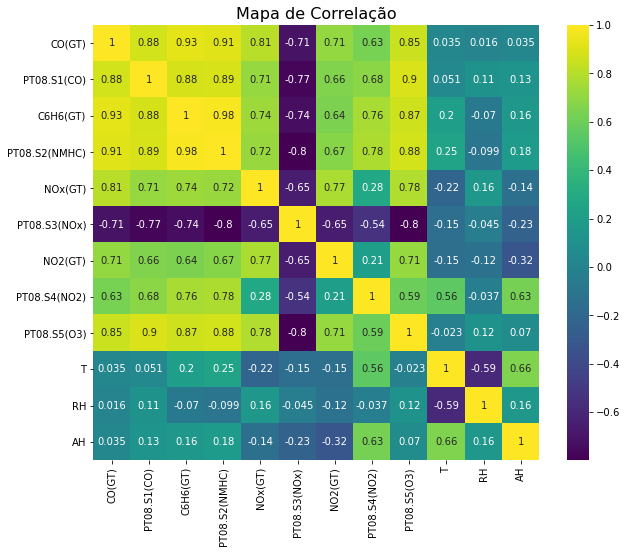

In [17]:
# Análise de correlação (sem NaN)
sns.heatmap(df_nan_knn.drop(columns = ['Datetime', 'Date', 'Time']).corr(), annot=True, cmap='viridis')
plt.title('Mapa de Correlação',fontsize=16)
plt.show()

**Definição do modelo de rede neural** 

**Preparação dos dados para o modelo**

**Variável alvo: CO**

In [18]:
# Preparação dos dados

# Definição dos atributos X e variável alvo y
X = df_nan_knn.drop(columns = ['Datetime', 'Date', 'Time', 'CO(GT)', 'C6H6(GT)','NOx(GT)', 'NO2(GT)'])
y = df_nan_knn['CO(GT)']
dt = df_nan_knn['Datetime']

# Normalização dos dados
ss = StandardScaler()
X_std = ss.fit_transform(X) # saída é um array numpy

In [19]:
# Divisão dos dados

# Treinamento
X_train = X_std[0:504]
y_train = y.iloc[0:504]
dt_train = dt.iloc[0:504]

# # Validação
# X_val = X_std[504:672]
# y_val = y.iloc[504:672]
# dt_train = dt.iloc[504:672]

# Teste
X_test = X_std[504:]
y_test = y.iloc[504:]
dt_test = dt.iloc[504:]

In [20]:
# Convertendo os dados para tensores
X_train_tensor = torch.as_tensor(X_train, dtype = torch.float32)
y_train_tensor = torch.as_tensor(np.array(y_train), dtype = torch.float32).view(-1,1)
# X_val_tensor = torch.as_tensor(X_val, dtype = torch.float32)
# y_val_tensor = torch.as_tensor(np.array(y_val), dtype = torch.float32).view(-1,1)
X_test_tensor = torch.as_tensor(X_test, dtype = torch.float32)
y_test_tensor = torch.as_tensor(np.array(y_test), dtype = torch.float32).view(-1,1)

print('X de Treinamento:', X_train.shape)
print('y de Treinamento:', y_train.shape)
# print('X de Validação:', X_val.shape)
# print('y de Validação:', y_val.shape)
print('X de Teste:', X_test.shape)
print('y de Teste:', y_test.shape)

X de Treinamento: (504, 8)
y de Treinamento: (504,)
X de Teste: (8853, 8)
y de Teste: (8853,)


**Modelo de Rede Neural Bayesiana**

In [21]:
# definição do modelo de rede neural bayesiana
class Net(nn.Module):

    def __init__(self, input_dim, output_dim, num_units, dropout, init_log_noise):
        super().__init__()

        # arquitetura da rede neural (1 camada oculta)
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_units = num_units

        self.l1 = nn.Linear(self.input_dim, self.num_units)
        self.l2 = nn.Linear(self.num_units, self.output_dim)

        # hiperparâmetros
        self.dropout = dropout
        self.log_noise = nn.Parameter(torch.tensor(
            [init_log_noise], dtype=torch.float32))

    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout)
        x = self.l2(x)

        return x
    
# função erro customizada
# negative log-likelihood
def log_gaussian_loss(output, target, sigma, no_dim):
    exponent = -0.5 * (target - output)**2 / (sigma**2)
    log_coeff = -no_dim * torch.log(sigma)
    return -(log_coeff + exponent).sum()

**Estudo para otimização do modelo**

In [22]:
# definição do modelo de rede neural bayesiana

DEVICE = torch.device("cpu")
EPOCHS = 400
N_IN_FEATURES = X_train.shape[1]
NOISE = torch.Tensor([[3]])


def net_model(trial):
    # n_layers = trial.suggest_int('n_layers', 1, 3)
    n_layers = 1
    layers = []
    in_features = N_IN_FEATURES

    for i in range(n_layers):
        out_features = trial.suggest_int('n_units_l{}'.format(i), 2, 32, 2)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float('dropout_l{}'.format(i), 0.0, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))

    return nn.Sequential(*layers)

def objective(trial):

    net = net_model(trial).to(DEVICE)

    optimizer_name = trial.suggest_categorical(
        'optimizer', ['Adam', 'RMSprop', 'SGD'])
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(net.parameters(), lr=lr)
    loss_function = log_gaussian_loss

    for epoch in range(EPOCHS):

        net.train()
        optimizer.zero_grad()
        output = net(X_train_tensor)
        loss = loss_function(output, y_train_tensor, NOISE, 1) / len(X_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            samples = []
            # número de amostras
            T = 200
            for i in (range(T)):
                pred = net(X_test_tensor)
                pred = pred.numpy()
                samples.append(pred)

            # resultados
            samples = np.array(samples)
            mean = np.mean(samples, axis=0).reshape(-1)
            # var = np.var(samples, axis=0).reshape(-1)
            mse = np.mean((mean - y_test)**2)

        trial.report(mse, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return mse

# otimização da rede neural bayesiana


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, timeout=1800)

pruned_trials = [t for t in study.trials if t.state ==
                 optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state ==
                   optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-08-11 11:11:20,660] A new study created in memory with name: no-name-fc8313b3-da1c-4a9a-84ae-c2748fccc98f
[I 2022-08-11 11:11:51,787] Trial 0 finished with value: 4.903050504402088 and parameters: {'n_units_l0': 6, 'dropout_l0': 0.052924475069221044, 'optimizer': 'RMSprop', 'lr': 6.936714676233914e-05}. Best is trial 0 with value: 4.903050504402088.
[I 2022-08-11 11:15:00,262] Trial 1 finished with value: 5.216076724791159 and parameters: {'n_units_l0': 30, 'dropout_l0': 0.06338795819998827, 'optimizer': 'RMSprop', 'lr': 7.871237684219296e-05}. Best is trial 0 with value: 4.903050504402088.
[I 2022-08-11 11:16:09,061] Trial 2 finished with value: 7.9624436543317 and parameters: {'n_units_l0': 22, 'dropout_l0': 0.48644992413002874, 'optimizer': 'Adam', 'lr': 3.8832976908049996e-05}. Best is trial 0 with value: 4.903050504402088.
[I 2022-08-11 11:17:26,104] Trial 3 finished with value: 0.4912023566007748 and parameters: {'n_units_l0': 28, 'dropout_l0': 0.39483151356340307, 'optim

Study statistics: 
  Number of finished trials:  100
  Number of pruned trials:  80
  Number of complete trials:  20
Best trial:
  Value:  0.26069703510899317
  Params: 
    n_units_l0: 24
    dropout_l0: 0.20086567434717764
    optimizer: RMSprop
    lr: 0.014433678347348723


**Rede Neural Ótima**

**Treinamento do modelo ótimo**

In [29]:
INPUT_DIM = X_train.shape[1]
NUM_UNITS = 24
DROPOUT = 0.20

opt_net = Net(input_dim=INPUT_DIM, output_dim=1,
          num_units=NUM_UNITS, dropout=DROPOUT, init_log_noise=0)

LEARN_RATE = 0.014
EPOCHS = 400
NOISE = torch.Tensor([[3]])

optimizer = optim.RMSprop(opt_net.parameters(), lr=LEARN_RATE)
# optimizer = optim.Adam(opt_net.parameters(), lr=LEARN_RATE)
loss_function = log_gaussian_loss

loss_log = []
for i in tqdm(range(EPOCHS)):
    optimizer.zero_grad()
    output = opt_net(X_train_tensor)
    loss = loss_function(output, y_train_tensor, NOISE, 1) / len(X_train)
    loss_log.append(loss.item())
    loss.backward()
    optimizer.step()

100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1043.93it/s]


No handles with labels found to put in legend.


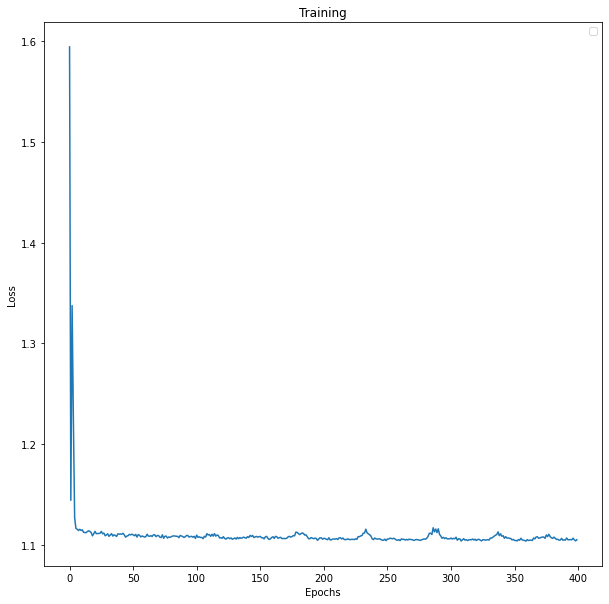

In [30]:
plt.plot(range(EPOCHS), loss_log)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training')
plt.legend()
# plt.savefig('train_air_uci.png')
plt.show()

**Teste do modelo ótimo**

In [31]:
with torch.no_grad():
    samples = []
    # número de amostras
    T = 200
    for i in tqdm(range(T)):
        pred = opt_net.forward(X_test_tensor)
        pred = pred.numpy()
        samples.append(pred)

    # resultados
    samples = np.array(samples)
    mean = np.mean(samples, axis=0).reshape(-1)
    var = np.var(samples, axis=0).reshape(-1)
    mse = np.mean((mean - y_test)**2)
    
    mae = np.mean(np.absolute(mean - y_test))
    
    r2 = r2_score(y_test, mean)

    print('\n')
    print('Resultado:')
    print('- MSE: {:.3f}'.format(mse))
    print('- MAE: {:.3f}'.format(mae))
    print('- R2: {:.3f}'.format(r2))

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1335.78it/s]



Resultado:
- MSE: 0.305
- MAE: 0.381
- R2: 0.849


In [32]:
w_begin = 500 
w_end = 800

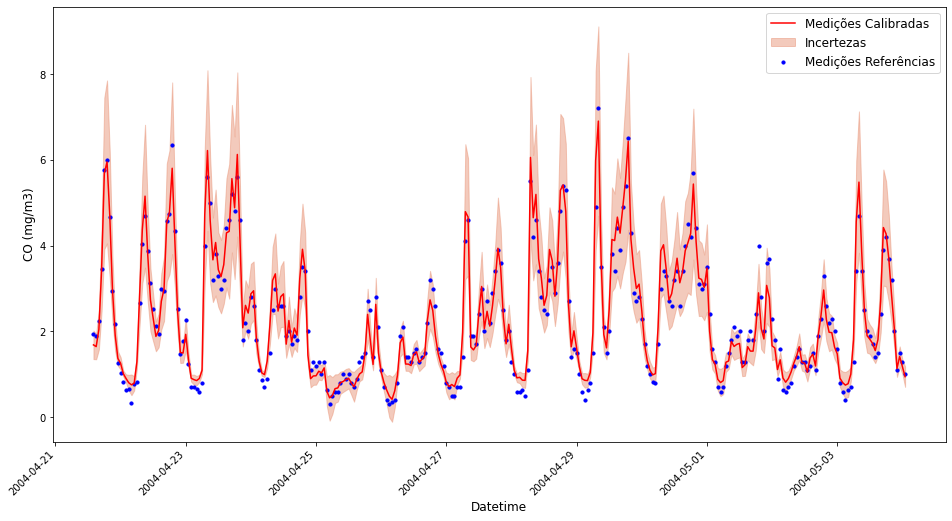

In [46]:
plt.rcParams['figure.figsize'] = [16,8]
plt.plot(dt_test[w_begin:w_end], mean[w_begin:w_end], 'r-', label='Medições Calibradas')
plt.fill_between(dt_test[w_begin:w_end],
                 mean[w_begin:w_end] + 3 * ((var[w_begin:w_end])**0.5),
                 mean[w_begin:w_end] - 3 * ((var[w_begin:w_end])**0.5),
                 alpha=0.5, color='darksalmon', label='Incertezas')
#plt.plot(X_test, y_test, 'k--', label='Curva Y = X^3')
plt.scatter(dt_test[w_begin:w_end], y_test[w_begin:w_end], marker='o', c='b',
            label='Medições Referências', s=10)
# plt.title('Resultados da calibração do sensor de CO')
plt.xlabel('Datetime', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('CO (mg/m3)', fontsize=12)
plt.legend(fontsize=12)
# plt.savefig('test_air_uci_co.png')
plt.show()

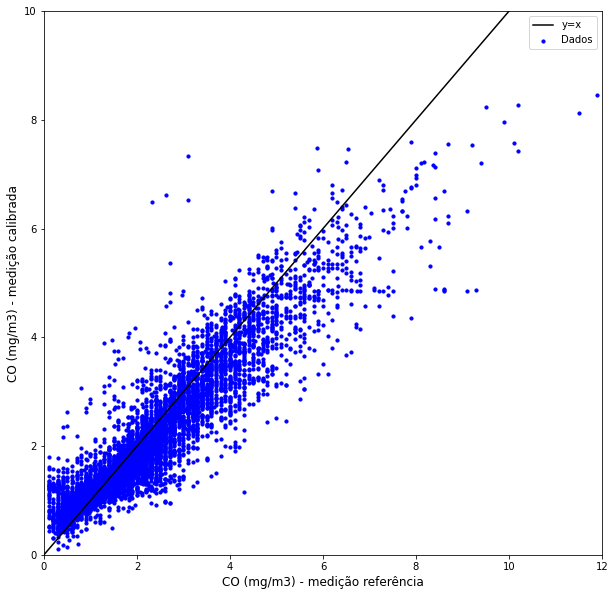

In [38]:
plt.rcParams['figure.figsize'] = [10,10]
plt.plot(range(-1,15), range(-1,15), 'k-', label='y=x')
plt.scatter(y_test, mean, marker='o', c='b',
            label='Dados', s=10)
# plt.title('Resultados da calibração do sensor de CO')
plt.xlabel('CO (mg/m3) - medição referência', fontsize=12)
plt.ylabel('CO (mg/m3) - medição calibrada', fontsize=12)
plt.xlim((0, 12))
plt.ylim((0, 10))
plt.legend()
plt.show()